In [22]:
%config IPCompleter.greedy=True
from matplotlib import pyplot as plt

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('winequality-white.csv', sep=';')

X = data[data.columns[:-1]].values

y = data['quality'].values


y_class = np.where(y<6, 0, 1)

In [4]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y_class, test_size=0.3)

In [5]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

## Gaussian Kernel  

In [6]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=0.01)

classifier.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

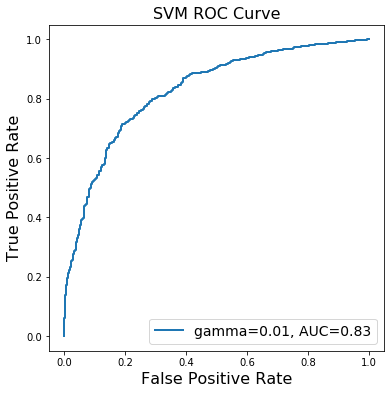

In [15]:
y_test_pred = classifier.decision_function(X_test_std)

from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

auc = metrics.auc(fpr, tpr)

fig = plt.figure(figsize=(6, 6))

plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

plt.legend(loc="lower right", fontsize=14)
plt.show()

## Cross Validation for parameter optimisations

In [16]:
C_range = np.logspace(-2, 3, 6)

gamma_range = np.logspace(-2, 1, 4)

param_grid = {'C': C_range, 'gamma': gamma_range}

score = 'roc_auc'

grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), 
                                    param_grid, 
                                    cv=5,  
                                    scoring=score)

grid.fit(X_train_std, y_train)

print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 1.0, 'gamma': 1.0} with a score of 0.86


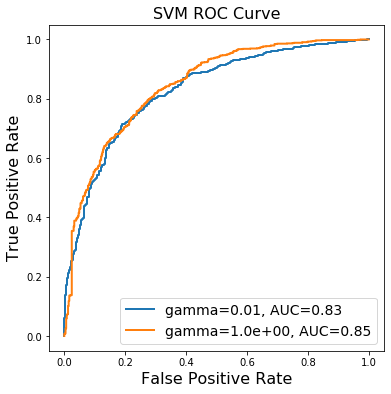

In [17]:
y_test_pred_cv = grid.decision_function(X_test_std)

fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_test_pred_cv)

auc_cv = metrics.auc(fpr_cv, tpr_cv)

fig = plt.figure(figsize=(6, 6))

plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv))
         

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

plt.legend(loc="lower right", fontsize=14)

plt.show()

In [18]:
from sklearn import metrics
kmatrix = metrics.pairwise.rbf_kernel(X_train_std, gamma=0.01)

In [19]:
kmatrix100 = kmatrix[:100, :100]

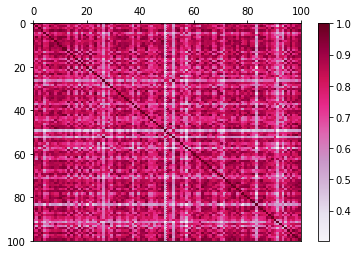

In [23]:
from matplotlib import cm
plt.pcolor(kmatrix100, cmap=cm.PuRd) 

plt.colorbar()

plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

plt.show()

## Testing with a bad gamma

In [42]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=50)

classifier.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

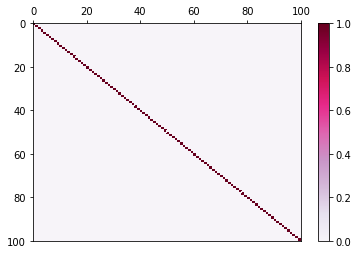

In [43]:
from sklearn import metrics
kmatrix = metrics.pairwise.rbf_kernel(X_train_std, gamma=50)

kmatrix100 = kmatrix[:100, :100]
from matplotlib import cm
plt.pcolor(kmatrix100, cmap=cm.PuRd) 

plt.colorbar()

plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

plt.show()

In [48]:
y_test_pred50 = classifier.decision_function(X_test_std)

fpr50, tpr50, th50= metrics.roc_curve(y_test, y_test_pred50)

auc50 = metrics.auc(fpr_cv, tpr_cv)

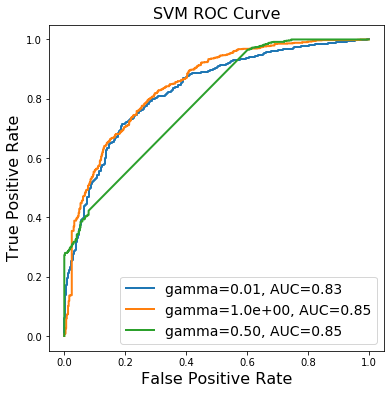

In [49]:
fig = plt.figure(figsize=(6, 6))

plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv))

plt.plot(fpr50, tpr50, '-', lw=2, label='gamma=0.50, AUC=%.2f' % auc50)
         


plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

plt.legend(loc="lower right", fontsize=14)

plt.show()